In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def rearrange_cols(cols, methods):
    cols2 = []
    for m in methods:
        for c in cols:
            if m in c:
                cols2.append(c)
                break
    
#     assert(len(cols2) == len(cols))
    return cols2

def get_nps(cols, manifest, names = None):
    if names is None:
        names = np.unique(manifest.Image.values)
    
    nps_list = []
    for c in cols:
        nps = []
        for name in names:
            nps.append(np.array(manifest[manifest.Image == name][c]))
        nps_list.append(np.mean(nps, 0))
        
    freqs = np.array(manifest[manifest.Image == names[0]]['Frequency'])
    
    return nps_list, freqs

In [3]:
manifest = pd.read_csv('dect2d_nps.csv')
dpi = 200
methods = ['full/FBP', 'low/FBP', 'L2 (universal)', 'WGAN (universal)', 'Ensemble', ]
display_name = ['Reference', 'FBP', 'L2 (all)', 'WGAN (all)', 'Ensemble',  ]

Text(0, 0.5, 'Intensity Normalized NPS (mm$^2$)')

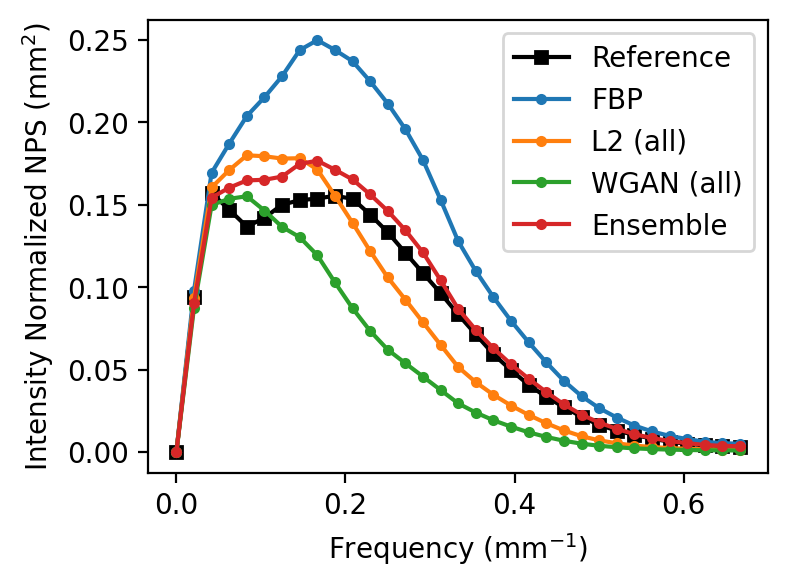

In [4]:
cols = [c for c in manifest]
cols = rearrange_cols(cols, methods)
nps_list, freqs = get_nps(cols, manifest)

plt.figure(figsize=[4,3], dpi=dpi)
plt.plot(freqs, nps_list[0], 'ks-', markersize = '4')
for nps in nps_list[1:]:
    plt.plot(freqs, nps, '.-')
plt.legend(display_name)
plt.xlabel('Frequency (mm$^{-1}$)')
plt.ylabel('Intensity Normalized NPS (mm$^2$)')